In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_customers.csv')

In [4]:
# Cheking data have any null value
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data['Spending Score (1-100)'].value_counts().unique()

array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [7]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

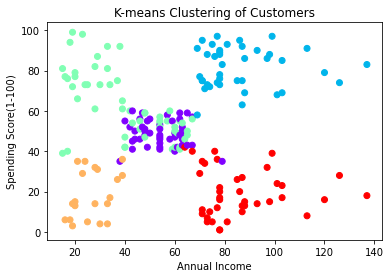

Cluster Centers (Scaled):
[[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]]
Cluster Centers (Original):
[[55.63829787 54.38297872 48.85106383]
 [32.875      86.1        81.525     ]
 [25.18518519 41.09259259 62.24074074]
 [46.25       26.75       18.35      ]
 [39.87179487 86.1025641  19.35897436]]


In [8]:
data = pd.read_csv('Mall_customers.csv')

# Select the relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the K-means clustering algorithm
num_clusters = 5  # You can set your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('K-means Clustering of Customers')
plt.show()

# Print the cluster centers (in scaled space)
cluster_centers_scaled = kmeans.cluster_centers_
print("Cluster Centers (Scaled):")
print(cluster_centers_scaled)

# Print the cluster centers (in original space)
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
print("Cluster Centers (Original):")
print(cluster_centers_original)

Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974


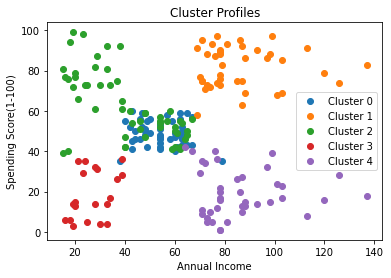

In [9]:
data['Cluster'] = kmeans.labels_

# Perform cluster analysis
cluster_analysis = data.groupby('Cluster').mean()

# Print cluster analysis
print("Cluster Analysis:")
print(cluster_analysis)

# Visualize cluster profiles
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_id}')
    
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('Cluster Profiles')
plt.legend()
plt.show()

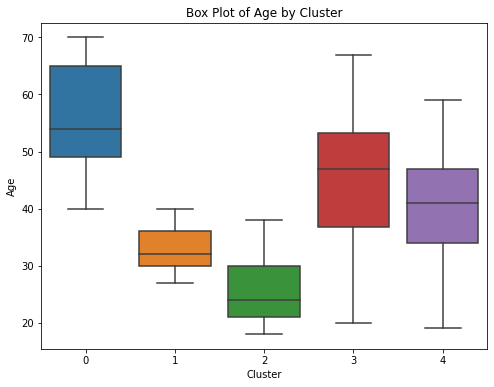

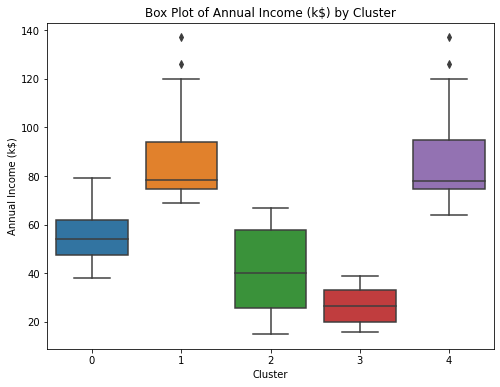

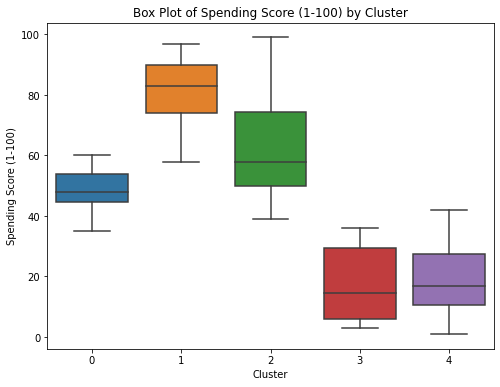

In [10]:
# Box plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

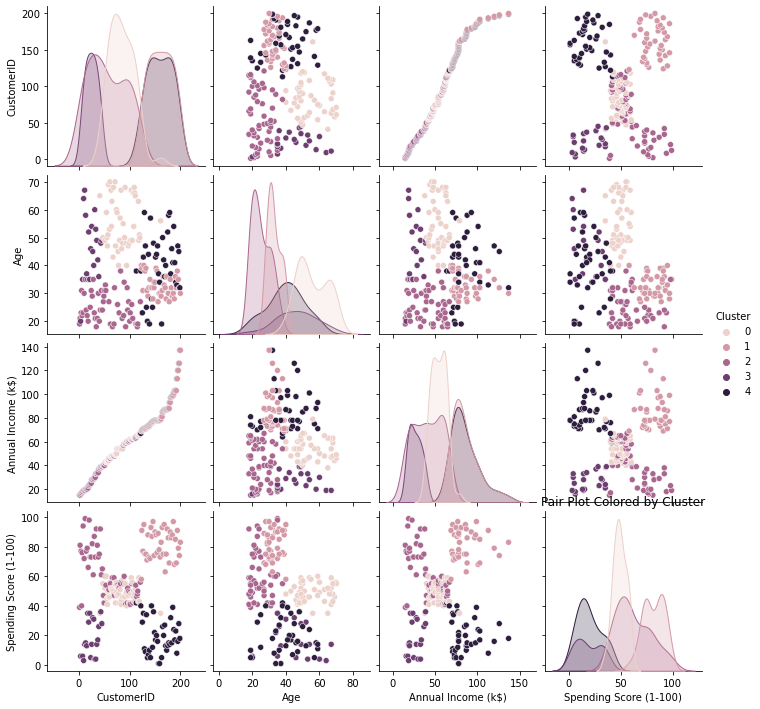

In [11]:
import seaborn as sns

# Pair plot colored by cluster
sns.pairplot(data=data, hue='Cluster', diag_kind='kde')
plt.title('Pair Plot Colored by Cluster')
plt.show()

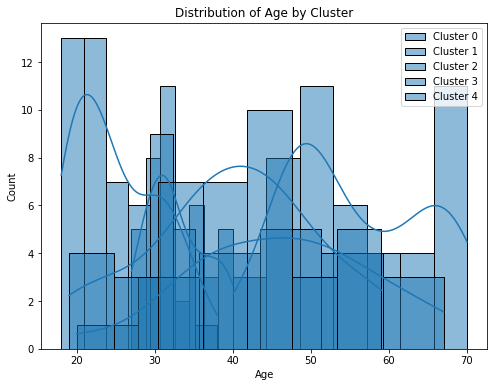

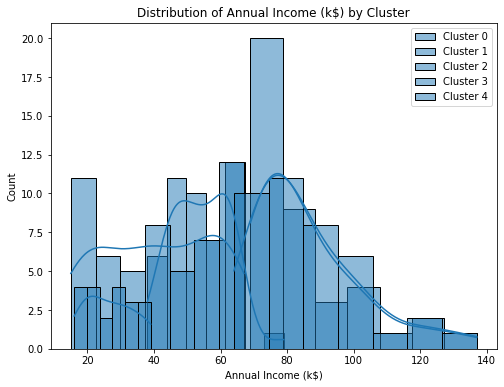

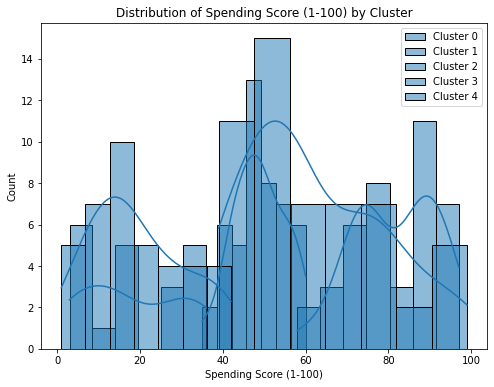

In [12]:
# Distribution plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_id]
        sns.histplot(cluster_data[feature], label=f'Cluster {cluster_id}', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
    plt.show()